In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Данный ноутбк содержит следующие части**:
 - перевод столбца с леммами из списка в строку
 - label encoding для целевой переменной
 - генерация дополнительных фичей
 - эксперименты с тоделб Catboost:
   - подбор фичей на части датасета
   - подбор оптимальных гиперпараметров на чатси датасета



### Перевод столбца с леммами в строку.

Изначально при обработке текста лемматизированный текст был сохранен в виде списков. Для дальнейших экспериментов он требуется в виде строки, состоящей из лемматизированых слов.

In [ ]:
df = pd.read_csv('E:\\!docum\\!HSE магистратура\\Задание проект\\обработанные данные\\lenta_news_with_lemmas_milana.csv')

In [ ]:
df

,Unnamed: 0,date,url,topic,tags,title,text
0,5,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,"Космонавты сомневаются в надежности ""Мира""","['становиться', 'известно', 'агентство', 'ассо..."
1,6,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,Взрыв в центре Москвы: пострадало 30 человек,"['зал', 'игровой', 'автомат', 'третий', 'ярус'..."
2,7,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,Япония кредитует Россию на полтора миллиарда д...,"['япония', 'принимать', 'решение', 'разморажив..."
3,8,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,Британцы отмечают двухлетие смерти Дианы,"['британец', 'отмечать', 'сегодня', 'скорбный'..."
4,9,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,Отмытые через Bank of NY деньги не имели отнош...,"['понедельник', 'директор', 'департамент', 'вн..."
...,...,...,...,...,...,...,...
1155604,1156513,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,Беженца из Украины избили после спора о нацистах,"['беженец', 'украина', 'избивать', 'город', 'к..."
1155605,1156514,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,Брат Нурмагомедова назвал цель выступления в B...,"['российский', 'боец', 'смешанный', 'стиль', '..."
1155606,1156515,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,Разработана технология печати ткани для трансп...,"['ученый', 'израильский', 'технологический', '..."
1155607,1156516,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,Республиканцы в Конгрессе потребовали проверит...,"['республиканец', 'палата', 'представитель', '..."


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#text = df['text']

In [ ]:
#del df

In [ ]:
part1 = len(df.text) // 2
part2 = len(df.text) - (len(df.text) // 2)
part1 + part2 == len(df.text)

True

In [ ]:
text_string = [' '.join(df.text[i].strip('][\'').split('\', \'')) for i in tqdm(range(part1))]

100%|███████████████████████████████████████████████████████████████████████| 577804/577804 [00:19<00:00, 29475.28it/s]


In [ ]:
text_string2 = [' '.join(df.text[i].strip('][\'').split('\', \'')) for i in tqdm(range(part1, len(df.text)))]

100%|███████████████████████████████████████████████████████████████████████| 577805/577805 [00:20<00:00, 28519.50it/s]


In [ ]:
text_string.extend(text_string2)

In [ ]:
df['text_str'] = text_string 

In [ ]:
df.drop('text', axis=1, inplace=True)

In [ ]:
#df.to_csv('lenta_mystem_lemmas_str.csv')

### Label encoding

Поскольку целевая переменная является строковой (нпзвание раздела новости), ее было решено перевести в цифры при помощи label encoding.

In [ ]:
df = pd.read_csv('lenta_mystem_lemmas_str.csv')

In [ ]:
df = df[~df.topic.isna()]
df = df[~df.text_str.isna()]

In [ ]:
df.isna().sum()

Unnamed: 0        0
date              0
url               0
topic             0
tags          31180
title             0
text_str          0
dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
l_enc = le.fit_transform(df.topic)

In [ ]:
le.classes_

array(['69-я параллель', 'Библиотека', 'Бизнес', 'Бывший СССР', 'Дом',
       'Забота о себе', 'Из жизни', 'Интернет и СМИ', 'Крым',
       'Культпросвет ', 'Культура', 'Легпром', 'МедНовости', 'Мир',
       'Мотор', 'Моя страна', 'Наука и техника', 'Нацпроекты', 'Оружие',
       'Путешествия', 'Россия', 'Силовые структуры', 'Сочи', 'Спорт',
       'Среда обитания', 'Ценности', 'ЧМ-2014', 'Экономика'], dtype=object)

In [ ]:
df['topic_le'] = l_enc

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df

,date,url,topic,tags,title,text_str,topic_le
0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,"Космонавты сомневаются в надежности ""Мира""",становиться известно агентство ассошиэйтед пре...,20
1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,Взрыв в центре Москвы: пострадало 30 человек,зал игровой автомат третий ярус подземный комп...,20
2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,Япония кредитует Россию на полтора миллиарда д...,япония принимать решение размораживать кредит ...,20
3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,Британцы отмечают двухлетие смерти Дианы,британец отмечать сегодня скорбный дата вторую...,13
4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,Отмытые через Bank of NY деньги не имели отнош...,понедельник директор департамент внешний связь...,20
...,...,...,...,...,...,...,...
1155604,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,Беженца из Украины избили после спора о нацистах,беженец украина избивать город кейзер американ...,13
1155605,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,Брат Нурмагомедова назвал цель выступления в B...,российский боец смешанный стиль мма двоюродный...,23
1155606,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,Разработана технология печати ткани для трансп...,ученый израильский технологический институт ра...,16
1155607,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,Республиканцы в Конгрессе потребовали проверит...,республиканец палата представитель конгресс сш...,13


In [ ]:
df['title_lemmas'] = title

In [ ]:
df

,date,url,topic,tags,title,text_str,topic_le,title_lemmas
0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,"Космонавты сомневаются в надежности ""Мира""",становиться известно агентство ассошиэйтед пре...,20,космонавт сомневаться надежность мир
1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,Взрыв в центре Москвы: пострадало 30 человек,зал игровой автомат третий ярус подземный комп...,20,взрыв центр москва пострадать человек
2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,Япония кредитует Россию на полтора миллиарда д...,япония принимать решение размораживать кредит ...,20,япония кредитовать россия полтора миллиард доллар
3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,Британцы отмечают двухлетие смерти Дианы,британец отмечать сегодня скорбный дата вторую...,13,британец отмечать двухлетие смерть диана
4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,Отмытые через Bank of NY деньги не имели отнош...,понедельник директор департамент внешний связь...,20,отмывать bank деньги иметь отношение мвф
...,...,...,...,...,...,...,...,...
1155604,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,Беженца из Украины избили после спора о нацистах,беженец украина избивать город кейзер американ...,13,беженец украина избивать спор нацист
1155605,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,Брат Нурмагомедова назвал цель выступления в B...,российский боец смешанный стиль мма двоюродный...,23,брат нурмагомедов называть цель выступление be...
1155606,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,Разработана технология печати ткани для трансп...,ученый израильский технологический институт ра...,16,разрабатывать технология печать ткань транспла...
1155607,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,Республиканцы в Конгрессе потребовали проверит...,республиканец палата представитель конгресс сш...,13,республиканец конгресс потребовать проверять к...


### Генерация доп. фичей

Для обучения моделей будем использовать не только столбец с текстом новости, но и другие столбцы, такие как дата или заголовки новостей.  

Обработаем дату несколькими способами.

In [ ]:
df

,date,url,topic,tags,title,text_str,topic_le,title_lemmas
0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,"Космонавты сомневаются в надежности ""Мира""",становиться известно агентство ассошиэйтед пре...,20,космонавт сомневаться надежность мир
1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,Взрыв в центре Москвы: пострадало 30 человек,зал игровой автомат третий ярус подземный комп...,20,взрыв центр москва пострадать человек
2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,Япония кредитует Россию на полтора миллиарда д...,япония принимать решение размораживать кредит ...,20,япония кредитовать россия полтора миллиард доллар
3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,Британцы отмечают двухлетие смерти Дианы,британец отмечать сегодня скорбный дата вторую...,13,британец отмечать двухлетие смерть диана
4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,Отмытые через Bank of NY деньги не имели отнош...,понедельник директор департамент внешний связь...,20,отмывать bank деньги иметь отношение мвф
...,...,...,...,...,...,...,...,...
1155604,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,Беженца из Украины избили после спора о нацистах,беженец украина избивать город кейзер американ...,13,беженец украина избивать спор нацист
1155605,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,Брат Нурмагомедова назвал цель выступления в B...,российский боец смешанный стиль мма двоюродный...,23,брат нурмагомедов называть цель выступление be...
1155606,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,Разработана технология печати ткани для трансп...,ученый израильский технологический институт ра...,16,разрабатывать технология печать ткань транспла...
1155607,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,Республиканцы в Конгрессе потребовали проверит...,республиканец палата представитель конгресс сш...,13,республиканец конгресс потребовать проверять к...


Для начала раздели ее на год, месяц, день и сделаем отдельные столбцы.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

Далее применим к дате следующую кодировку: применим следующую формулу для кодировки дат
$$ year*365 + month*30 + day $$

Далее отнормируем так, чтобы первая дата в датасете стала нулем, а последующие рассчитывались в кол-ве дней от нее.

In [ ]:
df['date_enc'] = df['year']*365 + df['month']*30 + df['day']

In [ ]:
min_date = df.date.min().year*365 + df.date.min().month*30 + df.date.min().day

In [ ]:
df['date_enc'] = df['date_enc'] - min_date

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df

,date,url,topic,tags,text_str,topic_le,title_lemmas,year,month,day,date_enc,season,day_of_week,dummy_weekday
0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,становиться известно агентство ассошиэйтед пре...,20,космонавт сомневаться надежность мир,1999,8,31,0,3,1,1
1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,зал игровой автомат третий ярус подземный комп...,20,взрыв центр москва пострадать человек,1999,8,31,0,3,1,1
2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,япония принимать решение размораживать кредит ...,20,япония кредитовать россия полтора миллиард доллар,1999,8,31,0,3,1,1
3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,британец отмечать сегодня скорбный дата вторую...,13,британец отмечать двухлетие смерть диана,1999,8,31,0,3,1,1
4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,понедельник директор департамент внешний связь...,20,отмывать bank деньги иметь отношение мвф,1999,8,31,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153089,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,беженец украина избивать город кейзер американ...,13,беженец украина избивать спор нацист,2022,11,18,8472,4,4,1
1153090,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,российский боец смешанный стиль мма двоюродный...,23,брат нурмагомедов называть цель выступление be...,2022,11,18,8472,4,4,1
1153091,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,ученый израильский технологический институт ра...,16,разрабатывать технология печать ткань транспла...,2022,11,18,8472,4,4,1
1153092,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,республиканец палата представитель конгресс сш...,13,республиканец конгресс потребовать проверять к...,2022,11,18,8472,4,4,1


In [ ]:
#df.to_csv('lenta_mystem_lemmas_str_largecol.csv')

Создадим категориальную переменную на сезон года следующим образом:
 - `зима=1` (включает месяца декабрь, январь и февраль)
 - `весна=2` (включает месяца март, апрель, май)
 - `лето=3` (включает месяца июнь, июль, август)
 - `осень=4` (включает месяца сентябрь, октябрь, ноябрь)

In [ ]:
def season_of_year(month):
    if (month == 1) or (month == 2) or (month == 12):
        val = 1
    elif (month == 3) or (month == 4) or (month == 5):
        val = 2
    elif (month == 6) or (month == 7) or (month == 8):
        val = 3
    elif (month == 9) or (month == 10) or (month == 11):
        val = 4
    return val

In [ ]:
df['season'] = df['month'].apply(season_of_year)

Создадим категориальную переменную на день недели следующим образом:
 - `понедельник=0`
 - `вторник=1`
 - `среда=2` 
 - `четверг=3`
 - `пятница=4`
 - `суббота=5` 
 - `воскресение=6`   

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['day_of_week'] = df['date'].dt.weekday

Создадим дамми переменную на рабочие дни:
 - `рабочий день=1` (включает пон, вт, ср, чт, пт)
 - `выходноц день=0` (включает сб, вс)

In [ ]:
def dummy_weekend(day):
    if (day == 5) or (day == 6):
        val = 0
    else:
        val = 1
    return val

In [ ]:
df['dummy_weekday'] = df['day_of_week'].apply(dummy_weekend)

In [ ]:
df.drop('title', axis=1, inplace=True)

In [ ]:
df

,Unnamed: 0,date,url,topic,tags,text_str,topic_le,title_lemmas,year,month,day,date_enc,season,day_of_week,dummy_weekday
0,0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,становиться известно агентство ассошиэйтед пре...,20,космонавт сомневаться надежность мир,1999,8,31,0,3,1,1
1,1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,зал игровой автомат третий ярус подземный комп...,20,взрыв центр москва пострадать человек,1999,8,31,0,3,1,1
2,2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,япония принимать решение размораживать кредит ...,20,япония кредитовать россия полтора миллиард доллар,1999,8,31,0,3,1,1
3,3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,британец отмечать сегодня скорбный дата вторую...,13,британец отмечать двухлетие смерть диана,1999,8,31,0,3,1,1
4,4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,понедельник директор департамент внешний связь...,20,отмывать bank деньги иметь отношение мвф,1999,8,31,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153089,1155604,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,беженец украина избивать город кейзер американ...,13,беженец украина избивать спор нацист,2022,11,18,8472,4,4,1
1153090,1155605,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,российский боец смешанный стиль мма двоюродный...,23,брат нурмагомедов называть цель выступление be...,2022,11,18,8472,4,4,1
1153091,1155606,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,ученый израильский технологический институт ра...,16,разрабатывать технология печать ткань транспла...,2022,11,18,8472,4,4,1
1153092,1155607,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,республиканец палата представитель конгресс сш...,13,республиканец конгресс потребовать проверять к...,2022,11,18,8472,4,4,1


In [ ]:
#df.to_csv('lenta_mystem_lemmas_str_largecol_v02.csv')

### Модели: catboost

In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
#pip install eli5

In [6]:
from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#import eli5

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
df = pd.read_csv('/content/drive/MyDrive/lenta_mystem_lemmas_str_largecol_v02.csv')
#df = pd.read_csv('lenta_mystem_lemmas_str_largecol.csv')

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df

,date,url,topic,tags,text_str,topic_le,title_lemmas,year,month,day,date_enc,season,day_of_week,dummy_weekday
0,1999-08-31,https://lenta.ru/news/1999/08/31/stancia_mir/,Россия,Все,становиться известно агентство ассошиэйтед пре...,20,космонавт сомневаться надежность мир,1999,8,31,0,3,1,1
1,1999-08-31,https://lenta.ru/news/1999/08/31/vzriv/,Россия,Все,зал игровой автомат третий ярус подземный комп...,20,взрыв центр москва пострадать человек,1999,8,31,0,3,1,1
2,1999-08-31,https://lenta.ru/news/1999/08/31/credit_japs/,Россия,Все,япония принимать решение размораживать кредит ...,20,япония кредитовать россия полтора миллиард доллар,1999,8,31,0,3,1,1
3,1999-08-31,https://lenta.ru/news/1999/08/31/diana/,Мир,Все,британец отмечать сегодня скорбный дата вторую...,13,британец отмечать двухлетие смерть диана,1999,8,31,0,3,1,1
4,1999-08-31,https://lenta.ru/news/1999/08/31/mvf/,Россия,Все,понедельник директор департамент внешний связь...,20,отмывать bank деньги иметь отношение мвф,1999,8,31,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153089,2022-11-18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,беженец украина избивать город кейзер американ...,13,беженец украина избивать спор нацист,2022,11,18,8472,4,4,1
1153090,2022-11-18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,российский боец смешанный стиль мма двоюродный...,23,брат нурмагомедов называть цель выступление be...,2022,11,18,8472,4,4,1
1153091,2022-11-18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,ученый израильский технологический институт ра...,16,разрабатывать технология печать ткань транспла...,2022,11,18,8472,4,4,1
1153092,2022-11-18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,республиканец палата представитель конгресс сш...,13,республиканец конгресс потребовать проверять к...,2022,11,18,8472,4,4,1


Функция для отрисовки важности признаков

In [12]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Некоторые темы представлены в датасете очень малочисленным наборот новостей. Таким образом, было решено сократить кол-во уникальных значений `topic` и оставить топики, которые представлены хотя бы 100 и более текстами.

Таким образом были удалены 6 тем: `'Библиотека', 'Оружие', 'ЧМ-2014', 'Мотор', 'МедНовости', 'Сочи'`

In [13]:
df.columns

Index(['date', 'url', 'topic', 'tags', 'text_str', 'topic_le', 'title_lemmas',
       'year', 'month', 'day', 'date_enc', 'season', 'day_of_week',
       'dummy_weekday'],
      dtype='object')

In [14]:
df['topic'].value_counts().index[-6:]

Index(['Библиотека', 'Оружие', 'ЧМ-2014', 'Мотор', 'МедНовости', 'Сочи'], dtype='object')

In [15]:
names = list(df['topic'].value_counts().index[-6:])
df = df[~df['topic'].isin(names)]

In [16]:
df['topic'].value_counts()

Россия               241055
Мир                  195778
Экономика            122120
Бывший СССР           93769
Спорт                 91267
Наука и техника       75609
Культура              71765
Интернет и СМИ        64800
Из жизни              44812
Силовые структуры     43287
Путешествия           22756
Ценности              22323
Дом                   22132
Среда обитания        15607
Бизнес                 7430
Моя страна             6128
Нацпроекты             4728
69-я параллель         3356
Забота о себе          3174
Крым                    666
Культпросвет            340
Легпром                 114
Name: topic, dtype: int64

Чтобы модель долго не обучалась, будем тестировать разные фичи и подбирать гиперы только на части данных.

<img src="shema_df.JPG"/>

In [17]:
dftrain, dftest, ytrain, ytest = train_test_split(df, df['topic_le'],
                                                  test_size=0.1,
                                                  stratify=df['topic'], 
                                                  random_state=123)

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dftrain, dftrain['topic_le'],
                                                  test_size=0.2,
                                                  stratify=dftrain['topic'],
                                                  random_state=123)

In [19]:
X1, X, y1, y = train_test_split(Xtrain, Xtrain['topic_le'],
                                                  test_size=0.05,
                                                  stratify=Xtrain['topic'],
                                                  random_state=123)

#### подбор фичей на части датасета

Для начала подберем оптимальный набор признаков (набор, с которым катбуст с деыолтными настройками будет выдавать наилучшее качество)

In [20]:
del df
del dftest
del X1

In [21]:
Xtest['topic'].value_counts()

Россия               43390
Мир                  35240
Экономика            21982
Бывший СССР          16878
Спорт                16428
Наука и техника      13610
Культура             12918
Интернет и СМИ       11664
Из жизни              8066
Силовые структуры     7792
Путешествия           4096
Ценности              4018
Дом                   3984
Среда обитания        2809
Бизнес                1337
Моя страна            1103
Нацпроекты             851
69-я параллель         604
Забота о себе          571
Крым                   120
Культпросвет            61
Легпром                 21
Name: topic, dtype: int64

In [22]:
Xtest.shape

(207543, 14)

Попробуем добавить еще 2 признака:
 - размер текста новости посчитанная как длина
 - размер текста новости по словам

In [ ]:
Xtest['sym_len'] = Xtest.text_str.apply(len)
Xtest['word_len'] = Xtest.text_str.apply(lambda x: len(x.split()))

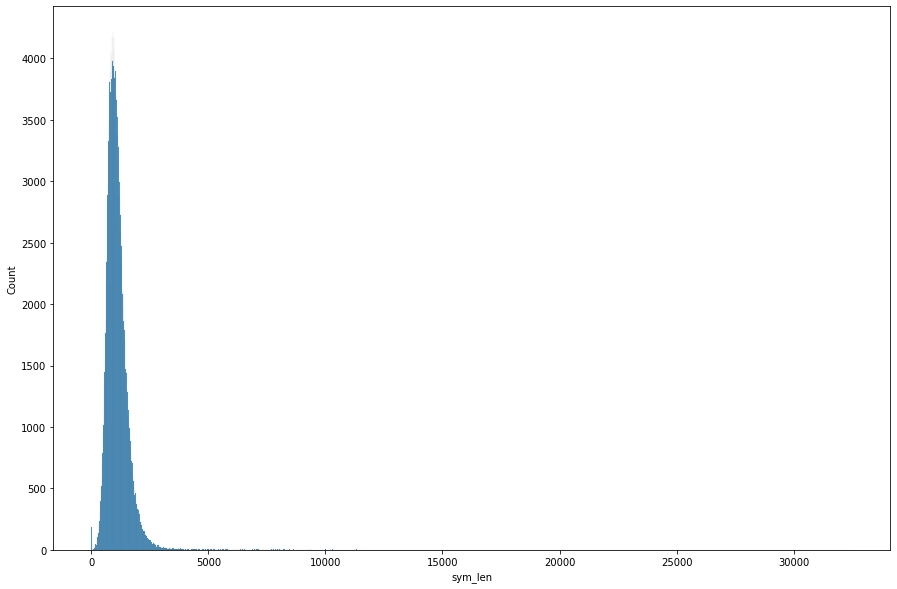

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=Xtest.sym_len)
plt.show()

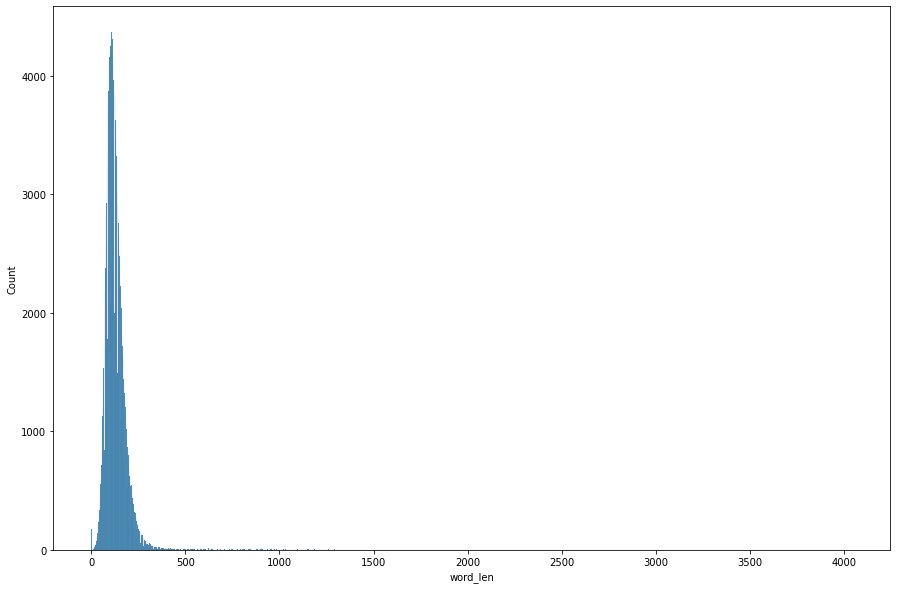

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=Xtest.word_len)
plt.show()

Видно, что распредеелния имеют большие хвосты => попробуем эти фичи отнормировать с помощью логарифмирования (попробуем и так, и так в модель добавить)

In [ ]:
Xtest['sym_len'] = np.log(Xtest['sym_len'])
Xtest['word_len'] = np.log(Xtest['word_len'])

Также попробуем добавить еще фичу как
$$ year*month $$

In [ ]:
Xtest['ym'] = Xtest['year'] * Xtest['month']

In [23]:
Xtest.head(2)

,date,url,topic,tags,text_str,topic_le,title_lemmas,year,month,day,date_enc,season,day_of_week,dummy_weekday
261088,2008-12-22,https://lenta.ru/news/2008/12/22/globe/,Культура,Все,британский комик саша барон коэн звезда ангел ...,10,вручать золотой глобус саша барон коэн,2008,12,22,3396,1,0,1
1134246,2022-10-06,https://lenta.ru/news/2022/10/06/rosekonoka/,Экономика,Госэкономика,российский экономика доказывать свой способнос...,27,мишустин оценивать состояние российский эконом...,2022,10,6,8430,4,3,1


In [24]:
Xtest.columns

Index(['date', 'url', 'topic', 'tags', 'text_str', 'topic_le', 'title_lemmas',
       'year', 'month', 'day', 'date_enc', 'season', 'day_of_week',
       'dummy_weekday'],
      dtype='object')

In [25]:
# Соотнесения закодированного таргета и названий категорий
dict_topic = dict(zip(Xtest.topic, Xtest.topic_le))
dict_topic = dict(sorted(dict_topic.items(), key=lambda item: item[1]))

Далее эксперименты выглядят следующим образом:
 - `X_test` - датафрейм, который подавался модели для обучения
 - `text_cols` - колонки, представляющие собой текст
 - `cat_cols ` - категориальные колонки

Loss functios в модели будет `MultiClass`, так как у нас многоклассовая классификация.
Eval_metric (метрика, по которой будет определяться переобучение) будет `TotalF1`.

In [37]:
X_test = Xtest[['text_str', 'title_lemmas', 'date_enc', 'year', 'season', 'day_of_week']]

text_cols = ['text_str', 'title_lemmas']
cat_cols = ['year', 'day_of_week', 'season']

In [38]:
clf = CatBoostClassifier(random_state=123, 
                         loss_function='MultiClass', 
                         eval_metric='TotalF1', 
                         task_type='GPU',
                         n_estimators=1000)

In [39]:
clf.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)

Learning rate set to 0.192741
0:	learn: 0.5788311	total: 257ms	remaining: 4m 16s
1:	learn: 0.6645881	total: 413ms	remaining: 3m 26s
2:	learn: 0.7328555	total: 542ms	remaining: 3m
3:	learn: 0.7360214	total: 683ms	remaining: 2m 50s
4:	learn: 0.7386743	total: 844ms	remaining: 2m 47s
5:	learn: 0.7490506	total: 1.01s	remaining: 2m 46s
6:	learn: 0.7497563	total: 1.18s	remaining: 2m 46s
7:	learn: 0.7522253	total: 1.35s	remaining: 2m 47s
8:	learn: 0.7564848	total: 1.48s	remaining: 2m 42s
9:	learn: 0.7632205	total: 1.61s	remaining: 2m 39s
10:	learn: 0.7650279	total: 1.76s	remaining: 2m 38s
11:	learn: 0.7656908	total: 1.92s	remaining: 2m 37s
12:	learn: 0.7675311	total: 2.08s	remaining: 2m 37s
13:	learn: 0.7688420	total: 2.22s	remaining: 2m 36s
14:	learn: 0.7723460	total: 2.37s	remaining: 2m 35s
15:	learn: 0.7737078	total: 2.52s	remaining: 2m 34s
16:	learn: 0.7754731	total: 2.65s	remaining: 2m 33s
17:	learn: 0.7766959	total: 2.8s	remaining: 2m 32s
18:	learn: 0.7773262	total: 2.94s	remaining: 2m 3

Реузльтаты построенных моделей выглядят следующм образом:
 - первая строка (закоменченная) говорит о том, какая модель обучалась и на каких признаках
 - далее делалось предсказание
 - строился classification_report
 - рассчитывался f1-score с микроусреднением
 - строится график важности признаков (не всегда)

In [40]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc', 'year', 'day_of_week']
y_pred17 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc', 'year', 'day_of_week']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred17, target_names=dict_topic))
f1_score(y, y_pred17, average='micro')

                   precision    recall  f1-score   support

   69-я параллель       0.64      0.74      0.68       121
           Бизнес       0.71      0.72      0.71       267
      Бывший СССР       0.86      0.90      0.88      3376
              Дом       0.83      0.84      0.84       797
    Забота о себе       0.80      0.93      0.86       114
         Из жизни       0.74      0.73      0.73      1613
   Интернет и СМИ       0.78      0.78      0.78      2333
             Крым       1.00      0.38      0.55        24
    Культпросвет        1.00      0.25      0.40        12
         Культура       0.87      0.89      0.88      2584
          Легпром       1.00      0.25      0.40         4
              Мир       0.85      0.86      0.86      7048
       Моя страна       0.80      0.86      0.83       221
  Наука и техника       0.90      0.88      0.89      2722
       Нацпроекты       0.89      0.92      0.90       170
      Путешествия       0.85      0.87      0.86       

0.8555734900864873

In [31]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc', 'year', 'dummy_weekday']
y_pred16 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc', 'year', 'dummy_weekday']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred16, target_names=dict_topic))
f1_score(y, y_pred16, average='micro')

                   precision    recall  f1-score   support

   69-я параллель       0.62      0.70      0.66       121
           Бизнес       0.70      0.75      0.72       267
      Бывший СССР       0.86      0.90      0.88      3376
              Дом       0.84      0.84      0.84       797
    Забота о себе       0.82      0.93      0.87       114
         Из жизни       0.75      0.73      0.74      1613
   Интернет и СМИ       0.79      0.78      0.78      2333
             Крым       1.00      0.25      0.40        24
    Культпросвет        0.75      0.25      0.38        12
         Культура       0.87      0.90      0.88      2584
          Легпром       0.00      0.00      0.00         4
              Мир       0.85      0.86      0.86      7048
       Моя страна       0.81      0.85      0.83       221
  Наука и техника       0.89      0.89      0.89      2722
       Нацпроекты       0.88      0.93      0.90       170
      Путешествия       0.86      0.86      0.86       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8565612276855622

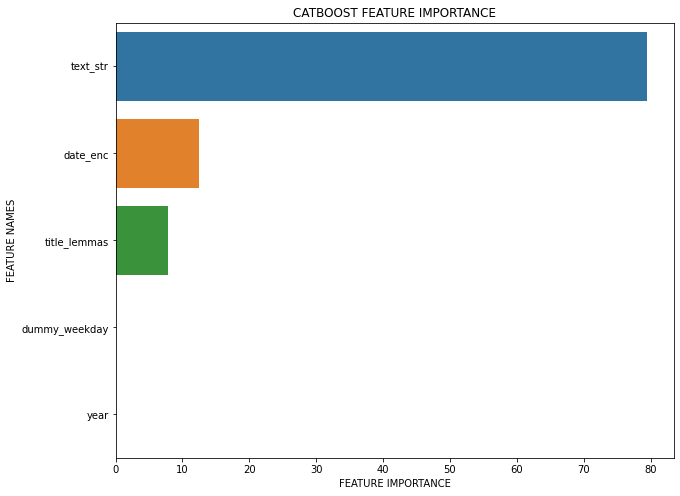

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'date_enc', 'year', 'dummy_weekday'],'CATBOOST ')

In [35]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc', 'year', 'season', 'day_of_week']
y_pred15 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc', 'year', 'season', 'day_of_week']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred15, target_names=dict_topic))
f1_score(y, y_pred15, average='micro')

                   precision    recall  f1-score   support

   69-я параллель       0.65      0.75      0.70       121
           Бизнес       0.71      0.73      0.72       267
      Бывший СССР       0.86      0.90      0.88      3376
              Дом       0.84      0.84      0.84       797
    Забота о себе       0.82      0.94      0.88       114
         Из жизни       0.75      0.73      0.74      1613
   Интернет и СМИ       0.78      0.78      0.78      2333
             Крым       0.91      0.42      0.57        24
    Культпросвет        1.00      0.25      0.40        12
         Культура       0.87      0.89      0.88      2584
          Легпром       0.00      0.00      0.00         4
              Мир       0.85      0.86      0.86      7048
       Моя страна       0.81      0.85      0.83       221
  Наука и техника       0.89      0.88      0.89      2722
       Нацпроекты       0.88      0.92      0.90       170
      Путешествия       0.86      0.87      0.86       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.856513045363656

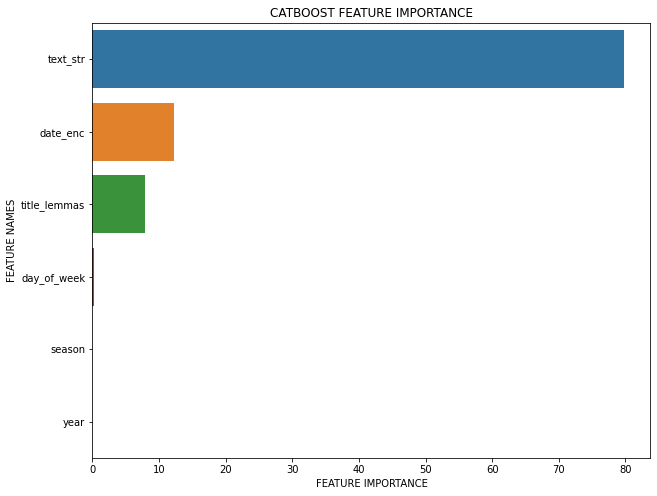

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'date_enc', 'year', 'season', 'day_of_week'],'CATBOOST ')

In [ ]:
eli5.catboost.explain_weights_catboost(clf)

Weight,Feature
0.7978,text_str
0.1220,date_enc
0.0785,title_lemmas
0.0017,day_of_week
0.0000,season
0,year


In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc', 'year']
y_pred14 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc', 'year']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred14))
f1_score(y, y_pred14, average='micro')

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       121
           2       0.71      0.73      0.72       267
           3       0.86      0.90      0.88      3376
           4       0.83      0.84      0.84       797
           5       0.82      0.93      0.87       114
           6       0.74      0.73      0.74      1613
           7       0.78      0.77      0.78      2333
           8       0.90      0.38      0.53        24
           9       1.00      0.17      0.29        12
          10       0.87      0.90      0.88      2584
          11       1.00      0.25      0.40         4
          13       0.85      0.86      0.85      7048
          15       0.79      0.85      0.82       221
          16       0.90      0.88      0.89      2722
          17       0.88      0.92      0.90       170
          19       0.85      0.86      0.86       819
          20       0.85      0.82      0.84      8678
          21       0.81    

0.8561275867884073

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc', 'ym']
X['ym'] = X['year'] * X['month']
y_pred13 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc', 'ym']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred13))
f1_score(y, y_pred13, average='micro')

              precision    recall  f1-score   support

           0       0.59      0.67      0.63       121
           1       0.00      0.00      0.00         2
           2       0.71      0.69      0.70       268
           3       0.85      0.89      0.87      3376
           4       0.85      0.84      0.84       797
           5       0.81      0.91      0.86       114
           6       0.73      0.73      0.73      1613
           7       0.79      0.76      0.78      2333
           8       0.62      0.21      0.31        24
           9       0.56      0.42      0.48        12
          10       0.86      0.90      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.86      7048
          15       0.84      0.89      0.87       221
          16       0.90      0.88      0.89      2722
          17       0.89      0.91      0.90       170
          19       0.83      0.88      0.86       819
          20       0.85    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8540422046637117

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'date_enc']
y_pred12 = clf.predict(X[['text_str', 'title_lemmas', 'date_enc']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred12))
f1_score(y, y_pred12, average='micro')

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       121
           1       0.00      0.00      0.00         2
           2       0.70      0.68      0.69       268
           3       0.86      0.89      0.88      3376
           4       0.84      0.84      0.84       797
           5       0.80      0.92      0.86       114
           6       0.73      0.74      0.74      1613
           7       0.78      0.76      0.77      2333
           8       0.54      0.29      0.38        24
           9       0.50      0.42      0.45        12
          10       0.86      0.89      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.85      0.88      0.87       221
          16       0.90      0.87      0.88      2722
          17       0.86      0.93      0.89       170
          19       0.83      0.88      0.85       819
          20       0.85    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8539699364039315

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'date_enc']
y_pred11 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'date_enc']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred11))
f1_score(y, y_pred11, average='micro')

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       121
           1       0.00      0.00      0.00         2
           2       0.73      0.69      0.71       268
           3       0.86      0.89      0.87      3376
           4       0.85      0.84      0.84       797
           5       0.81      0.91      0.86       114
           6       0.73      0.73      0.73      1613
           7       0.79      0.76      0.78      2333
           8       0.67      0.25      0.36        24
           9       0.50      0.33      0.40        12
          10       0.86      0.90      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.88      0.86       221
          16       0.90      0.88      0.89      2722
          17       0.88      0.91      0.89       170
          19       0.83      0.88      0.86       819
          20       0.85    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8546203507419541

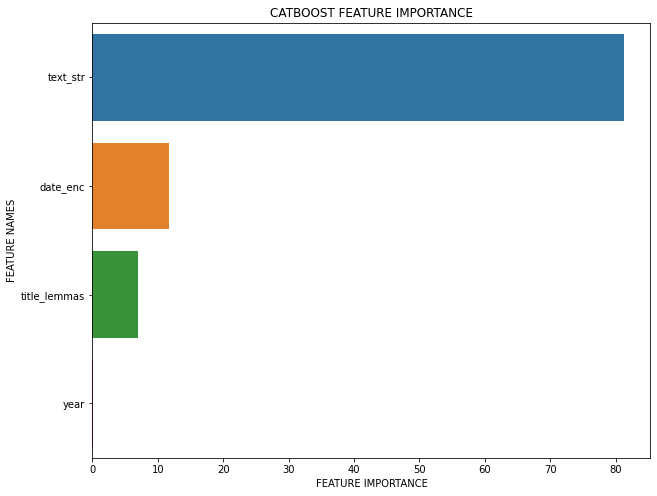

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'date_enc'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', cat'date_enc']
y_pred10 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'date_enc']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred10))
f1_score(y, y_pred10, average='micro')

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       121
           1       0.00      0.00      0.00         2
           2       0.70      0.63      0.67       268
           3       0.86      0.89      0.88      3376
           4       0.84      0.83      0.83       797
           5       0.73      0.88      0.80       114
           6       0.73      0.73      0.73      1613
           7       0.78      0.76      0.77      2333
           8       0.43      0.12      0.19        24
           9       0.56      0.42      0.48        12
          10       0.86      0.90      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.91      0.87       221
          16       0.90      0.87      0.88      2722
          17       0.89      0.92      0.90       170
          19       0.83      0.88      0.86       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8514887261514742

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'title', 'year', 'month', 'day']
y_pred9 = clf.predict(X[['text_str', 'title_lemmas', 'title', 'year', 'month', 'day']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred9))
f1_score(y, y_pred9, average='micro')

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       121
           1       0.00      0.00      0.00         2
           2       0.71      0.65      0.68       268
           3       0.86      0.89      0.88      3376
           4       0.83      0.83      0.83       797
           5       0.76      0.90      0.82       114
           6       0.73      0.72      0.72      1613
           7       0.78      0.78      0.78      2333
           8       0.60      0.25      0.35        24
           9       0.50      0.42      0.45        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.87      0.86      7048
          15       0.81      0.87      0.84       221
          16       0.90      0.86      0.88      2722
          17       0.88      0.91      0.89       170
          19       0.84      0.88      0.86       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.85129601079206

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len'] логарифмирование
X['sym_len'] = np.log(X['sym_len'])
X['word_len'] = np.log(X['word_len'])
y_pred8 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred8))
f1_score(y, y_pred8, average='micro')

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       121
           1       0.00      0.00      0.00         2
           2       0.72      0.68      0.70       268
           3       0.86      0.89      0.87      3376
           4       0.83      0.83      0.83       797
           5       0.75      0.88      0.81       114
           6       0.73      0.71      0.72      1613
           7       0.78      0.77      0.77      2333
           8       0.67      0.25      0.36        24
           9       0.71      0.42      0.53        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.89      0.86       221
          16       0.89      0.87      0.88      2722
          17       0.90      0.92      0.91       170
          19       0.83      0.87      0.85       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8503565234149162

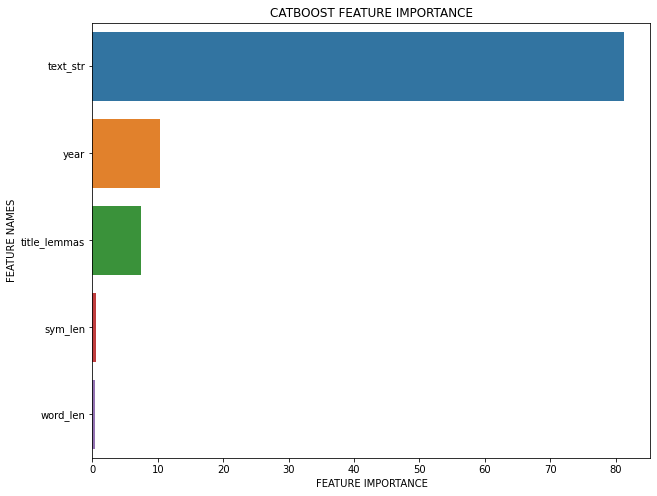

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len']
X['sym_len'] = X.text_str.apply(len)
X['word_len'] = X.text_str.apply(lambda x: len(x.split()))
y_pred7 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred7))
f1_score(y, y_pred7, average='micro')

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       121
           1       0.00      0.00      0.00         2
           2       0.72      0.68      0.70       268
           3       0.86      0.89      0.87      3376
           4       0.83      0.83      0.83       797
           5       0.75      0.88      0.81       114
           6       0.73      0.71      0.72      1613
           7       0.78      0.77      0.77      2333
           8       0.67      0.25      0.36        24
           9       0.71      0.42      0.53        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.89      0.86       221
          16       0.89      0.87      0.88      2722
          17       0.90      0.92      0.91       170
          19       0.83      0.87      0.85       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8503565234149162

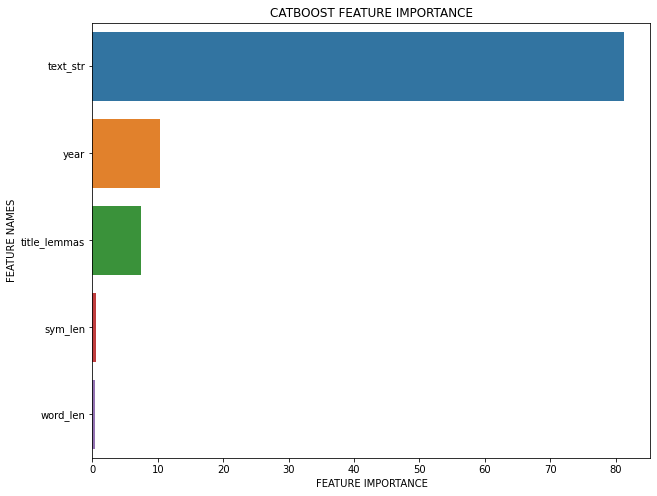

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'sym_len', 'word_len'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year']
y_pred6 = clf.predict(X[['text_str', 'title_lemmas', 'year']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred6))
f1_score(y, y_pred6, average='micro')

              precision    recall  f1-score   support

           0       0.59      0.64      0.61       121
           1       0.00      0.00      0.00         2
           2       0.71      0.65      0.68       268
           3       0.86      0.89      0.87      3376
           4       0.84      0.83      0.83       797
           5       0.73      0.85      0.79       114
           6       0.72      0.72      0.72      1613
           7       0.78      0.76      0.77      2333
           8       0.55      0.25      0.34        24
           9       0.62      0.42      0.50        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.84      0.87      0.86       221
          16       0.90      0.87      0.88      2722
          17       0.89      0.91      0.90       170
          19       0.83      0.87      0.85       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8510792060127192

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'title']
y_pred5 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'title']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred5))
f1_score(y, y_pred5, average='micro')

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       121
           1       0.00      0.00      0.00         2
           2       0.71      0.67      0.69       268
           3       0.87      0.90      0.88      3376
           4       0.84      0.83      0.83       797
           5       0.74      0.86      0.80       114
           6       0.72      0.72      0.72      1613
           7       0.78      0.77      0.78      2333
           8       0.55      0.25      0.34        24
           9       0.57      0.33      0.42        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.81      0.86      0.83       221
          16       0.89      0.87      0.88      2722
          17       0.87      0.91      0.89       170
          19       0.83      0.87      0.85       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8511514742724995

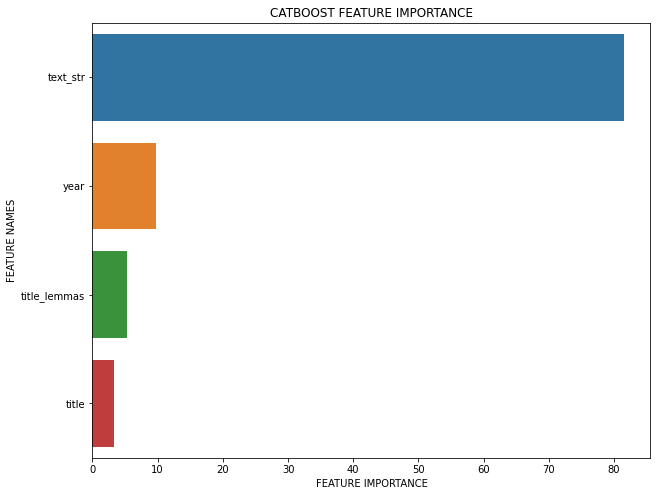

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'title'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'date_enc']
y_pred4 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'date_enc']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred4))
f1_score(y, y_pred4, average='micro')

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       121
           1       0.00      0.00      0.00         2
           2       0.70      0.63      0.67       268
           3       0.86      0.89      0.88      3376
           4       0.84      0.83      0.83       797
           5       0.73      0.88      0.80       114
           6       0.73      0.73      0.73      1613
           7       0.78      0.76      0.77      2333
           8       0.43      0.12      0.19        24
           9       0.56      0.42      0.48        12
          10       0.86      0.90      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.91      0.87       221
          16       0.90      0.87      0.88      2722
          17       0.89      0.92      0.90       170
          19       0.83      0.88      0.86       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8514887261514742

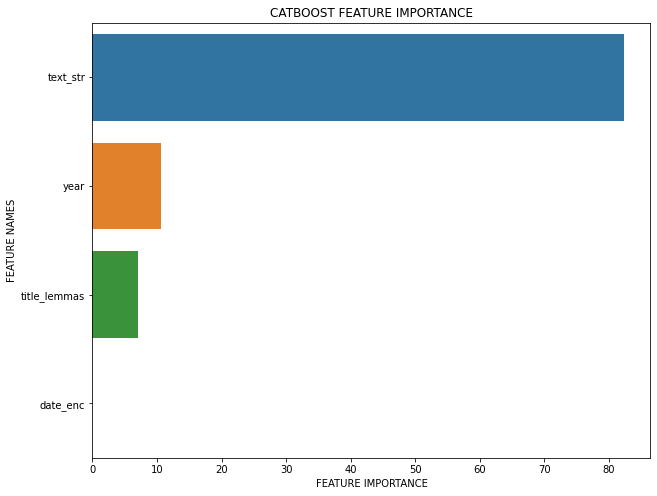

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'date_enc'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas', 'year', 'month', 'day']
y_pred3 = clf.predict(X[['text_str', 'title_lemmas', 'year', 'month', 'day']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred3))
f1_score(y, y_pred3, average='micro')

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       121
           1       0.00      0.00      0.00         2
           2       0.71      0.60      0.65       268
           3       0.86      0.90      0.88      3376
           4       0.83      0.83      0.83       797
           5       0.73      0.88      0.80       114
           6       0.73      0.72      0.72      1613
           7       0.78      0.77      0.77      2333
           8       0.64      0.29      0.40        24
           9       0.60      0.50      0.55        12
          10       0.86      0.89      0.88      2584
          11       0.00      0.00      0.00         4
          13       0.85      0.86      0.85      7048
          15       0.83      0.90      0.87       221
          16       0.89      0.87      0.88      2722
          17       0.87      0.92      0.90       170
          19       0.83      0.87      0.85       819
          20       0.84    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8506937752938909

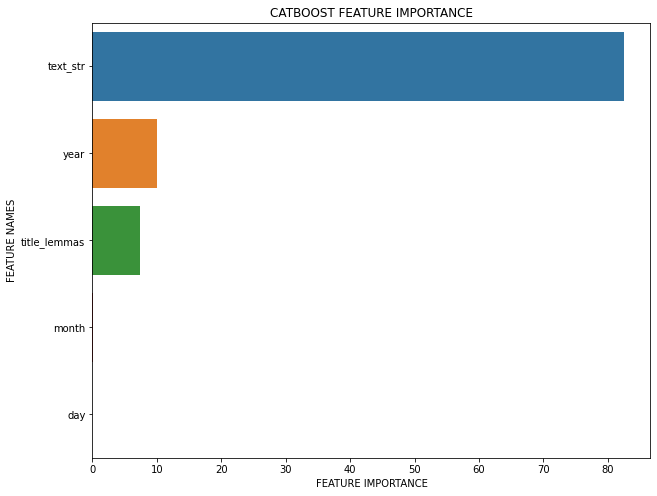

In [ ]:
#plot the catboost result
plot_feature_importance(clf.get_feature_importance(),['text_str', 'title_lemmas', 'year', 'month', 'day'],'CATBOOST ')

In [ ]:
# Catboost 1000 деревьев + ['text_str', 'title_lemmas']
y_pred2 = clf.predict(X[['text_str', 'title_lemmas']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred2))
f1_score(y, y_pred2, average='micro')

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       121
           1       0.00      0.00      0.00         2
           2       0.52      0.41      0.46       268
           3       0.83      0.88      0.85      3376
           4       0.79      0.79      0.79       797
           5       0.66      0.75      0.70       114
           6       0.73      0.71      0.72      1613
           7       0.77      0.75      0.76      2333
           8       0.56      0.21      0.30        24
           9       0.67      0.17      0.27        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.84      0.85      0.84      7048
          15       0.69      0.84      0.76       221
          16       0.85      0.84      0.85      2722
          17       0.83      0.90      0.86       170
          19       0.80      0.84      0.82       819
          20       0.83    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8311331663133551

In [ ]:
# Catboost 1000 деревьев + ['text_str']
y_pred1 = clf.predict(X[['text_str']])
#print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1))
f1_score(y, y_pred1, average='micro')

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       121
           1       0.00      0.00      0.00         2
           2       0.56      0.40      0.46       268
           3       0.82      0.87      0.85      3376
           4       0.79      0.78      0.79       797
           5       0.64      0.74      0.68       114
           6       0.72      0.69      0.71      1613
           7       0.77      0.72      0.74      2333
           8       0.22      0.08      0.12        24
           9       0.67      0.33      0.44        12
          10       0.86      0.89      0.87      2584
          11       0.00      0.00      0.00         4
          13       0.83      0.84      0.83      7048
          15       0.70      0.83      0.76       221
          16       0.83      0.86      0.85      2722
          17       0.81      0.91      0.86       170
          19       0.80      0.83      0.81       819
          20       0.82    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8258094045095394

**Выводы**: качество примерно около 0.85. Основными фичами являются `'text_str', 'title_lemmas', 'date_enc'`. 

_Примечание 1_ : модель с добавление `year` показывала лучше качество, чем без него (хоть важность у него и равна практически ноль).  

_Примечание 2_ : из логических соображений соображений (выводы можно найти в Random_forest.ipybn) было решено в итоговую модель включить признаки `season и day_of_week`

#### подбор гиперпараметров на части датасета

После фиксирования определенного пула признаков, перейдем к подбор гиперпараметров.  
Так как эксперименты проводились не один день, набор фичей при подборе оптимальных гиперпараметров может отличаться время от времени (однако это особо не влияет на качество подбора, тк все основными фичи были добавлены, а включение/невключение других на качество модели особо не влияло).

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.ticker as ticker

In [ ]:
X_test = Xtest[['text_str', 'title_lemmas', 'year', 'date_enc']]

text_cols = ['text_str', 'title_lemmas']
cat_cols = ['year']

In [ ]:
clf = CatBoostClassifier(random_state=123, 
                         loss_function='MultiClass', 
                         eval_metric='TotalF1', 
                         task_type='GPU',
                         n_estimators=1600,
                         learning_rate=0.2)

Логика подбора будет следующая: сначала будет перебирать с большим промежутком. далее станет понятно, в каком примерно диапазоне лежит оптимальное значение и переберем этот диапазон по более мелкой сетке (иногда так будет проделываться несколько раз для более точного анализа).

**Для начала подберем оптимальное кол-во деревьев.** 

In [ ]:
params = {'n_estimators': np.arange(100,3601,500)}
grid_catb_trees01 = GridSearchCV(clf,
                               params,
                               cv = 5,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)

# Обучили модель на ВСЕХ данных
grid_catb_trees = grid_catb_trees01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by model Catboost:', grid_catb_trees.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by model Catboost:',grid_catb_trees.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'n_estimator'

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1704:	learn: 0.8515704	total: 2m 24s	remaining: 2m 40s
1705:	learn: 0.8515721	total: 2m 24s	remaining: 2m 40s
1706:	learn: 0.8516137	total: 2m 24s	remaining: 2m 40s
1707:	learn: 0.8516137	total: 2m 24s	remaining: 2m 40s
1708:	learn: 0.8516357	total: 2m 25s	remaining: 2m 40s
1709:	learn: 0.8516686	total: 2m 25s	remaining: 2m 40s
1710:	learn: 0.8516908	total: 2m 25s	remaining: 2m 40s
1711:	learn: 0.8516451	total: 2m 25s	remaining: 2m 40s
1712:	learn: 0.8516899	total: 2m 25s	remaining: 2m 40s
1713:	learn: 0.8517047	total: 2m 25s	remaining: 2m 40s
1714:	learn: 0.8517044	total: 2m 25s	remaining: 2m 39s
1715:	learn: 0.8517702	total: 2m 25s	remaining: 2m 39s
1716:	learn: 0.8518138	total: 2m 25s	remaining: 2m 39s
1717:	learn: 0.8519221	total: 2m 25s	remaining: 2m 39s
1718:	learn: 0.8518707	total: 2m 25s	remaining: 2m 39s
1719:	learn: 0.8518584	total: 2m 25s	remaining: 2m 39s
1720:	learn: 0.8518480	total: 2m 25s	remaining: 2m 3

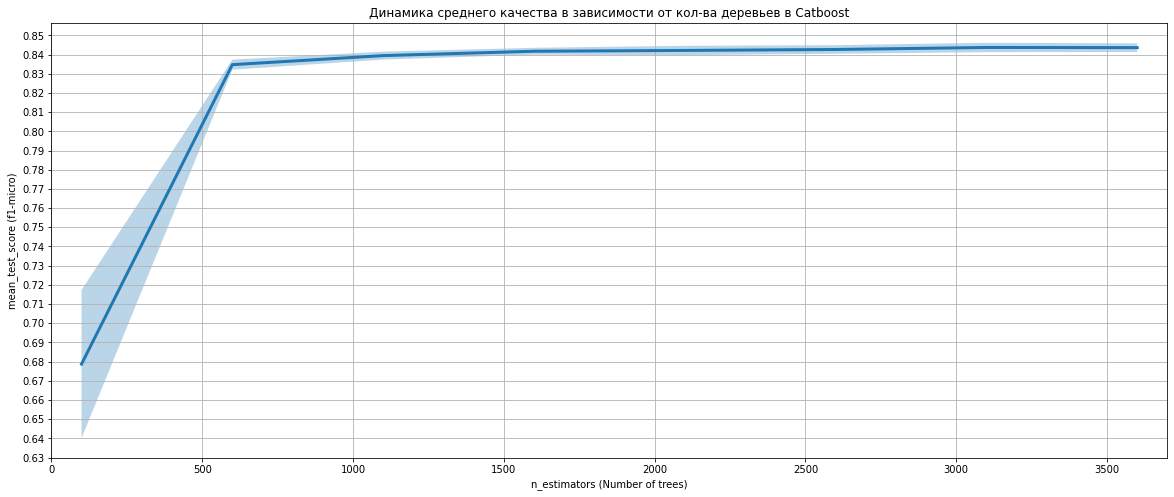

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_catb_trees.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(100,3601,500)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
plt.xlim([0,3700])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-micro)')
ax.set_xlabel('n_estimators (Number of trees)')
ax.set_title('Динамика среднего качества в зависимости от кол-ва деревьев в Catboost')
plt.show()

Из графика можно заметить, что качество модели начинает стабилизироваться примерно на 1000 деревьев и выше. Наилучшее достигается примерно на 3000.

Для того, чтобы решить, стоит ли прирост в качестве обучение модели с 3000 деревьями (потому что это очень долго и памятизатратно), посмотрим на прирост качества в процентах от наилучшего результата.

In [ ]:
y_catb

0    0.678698
1    0.834748
2    0.839466
3    0.841738
4    0.842163
5    0.842658
6    0.843707
7    0.843620
Name: mean_test_score, dtype: float64

In [ ]:
y_catb[6] - y_catb

0    0.165009
1    0.008959
2    0.004241
3    0.001969
4    0.001544
5    0.001049
6    0.000000
7    0.000087
Name: mean_test_score, dtype: float64

In [ ]:
(y_catb*100) / y_catb[6]

0     80.442401
1     98.938194
2     99.497362
3     99.766668
4     99.817034
5     99.875624
6    100.000000
7     99.989721
Name: mean_test_score, dtype: float64

In [ ]:
x_catb

array([ 100,  600, 1100, 1600, 2100, 2600, 3100, 3600])

Как видно, качество отличается десятые и сотые => обучать модель с 3000 деревьями не стоит того

Неплохое качество достигается примерно на 1600 деревьях. Их и оставим.

**Подберем оптимальный learning rate**

In [ ]:
# Подберем learning rate
params = {'learning_rate': np.arange(0.01,1.01,0.2)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 5,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.7569029	total: 3m 4s	remaining: 25.4s
1406:	learn: 0.7570326	total: 3m 4s	remaining: 25.3s
1407:	learn: 0.7569639	total: 3m 4s	remaining: 25.2s
1408:	learn: 0.7568589	total: 3m 4s	remaining: 25s
1409:	learn: 0.7576697	total: 3m 4s	remaining: 24.9s
1410:	learn: 0.7576338	total: 3m 4s	remaining: 24.8s
1411:	learn: 0.7573063	total: 3m 4s	remaining: 24.6s
1412:	learn: 0.7573068	total: 3m 5s	remaining: 24.5s
1413:	learn: 0.7574390	total: 3m 5s	remaining: 24.4s
1414:	learn: 0.7573145	total: 3m 5s	remaining: 24.2s
1415:	learn: 0.7577749	total: 3m 5s	remaining: 24.1s
1416:	learn: 0.7575649	total: 3m 5s	remaining: 24s
1417:	learn: 0.7568866	total: 3m 5s	remaining: 23.8s
1418:	learn: 0.7569782	total: 3m 5s	remaining: 23.7s
1419:	learn: 0.7569598	total: 3m 5s	remaining: 23.6s
1420:	learn: 0.7567863	total: 3m 6s	remaining: 23.4s
1421:	learn: 0.7566697	total: 3m 6s	remaining: 23.3s
1422:	learn: 0.7566895	total: 3m 6s

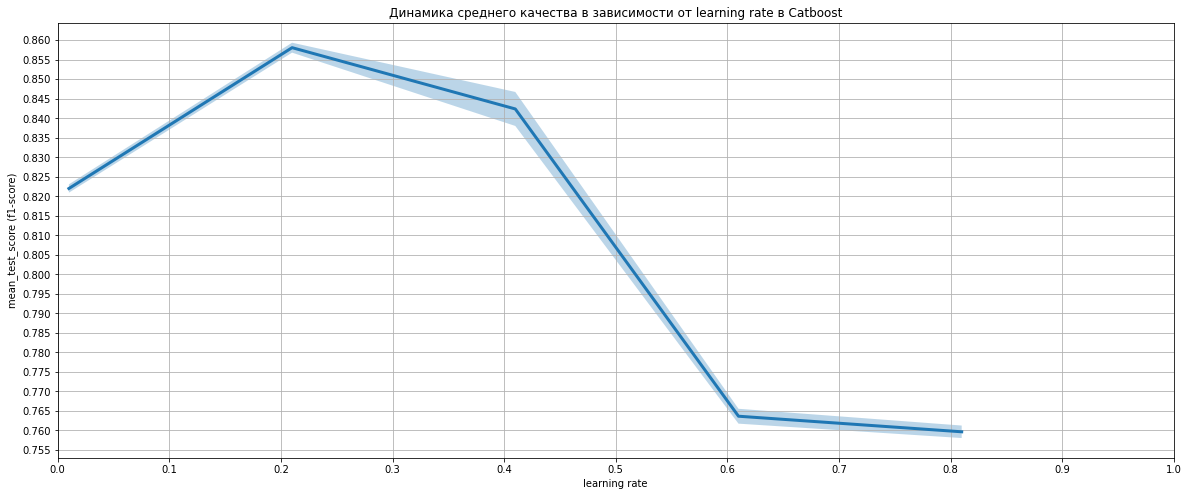

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(0.01,1.01,0.2)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
plt.xlim([0,1])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от learning rate в Catboost')
plt.show()

In [ ]:
y_catb

0    0.821995
1    0.858077
2    0.842375
3    0.763659
4    0.759670
Name: mean_test_score, dtype: float64

In [ ]:
# Подберем learning rate
params = {'learning_rate': np.arange(0.1,0.31,0.1)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 5,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.9007009	total: 2m 42s	remaining: 22.4s
1406:	learn: 0.9008401	total: 2m 42s	remaining: 22.3s
1407:	learn: 0.9009060	total: 2m 42s	remaining: 22.2s
1408:	learn: 0.9009550	total: 2m 42s	remaining: 22.1s
1409:	learn: 0.9009431	total: 2m 43s	remaining: 22s
1410:	learn: 0.9010097	total: 2m 43s	remaining: 21.9s
1411:	learn: 0.9009729	total: 2m 43s	remaining: 21.7s
1412:	learn: 0.9010212	total: 2m 43s	remaining: 21.6s
1413:	learn: 0.9010558	total: 2m 43s	remaining: 21.5s
1414:	learn: 0.9010429	total: 2m 43s	remaining: 21.4s
1415:	learn: 0.9011083	total: 2m 43s	remaining: 21.3s
1416:	learn: 0.9011275	total: 2m 43s	remaining: 21.2s
1417:	learn: 0.9011813	total: 2m 44s	remaining: 21.1s
1418:	learn: 0.9012487	total: 2m 44s	remaining: 20.9s
1419:	learn: 0.9011975	total: 2m 44s	remaining: 20.8s
1420:	learn: 0.9011872	total: 2m 44s	remaining: 20.7s
1421:	learn: 0.9011491	total: 2m 44s	remaining: 20.6s
1422:	learn: 0.9

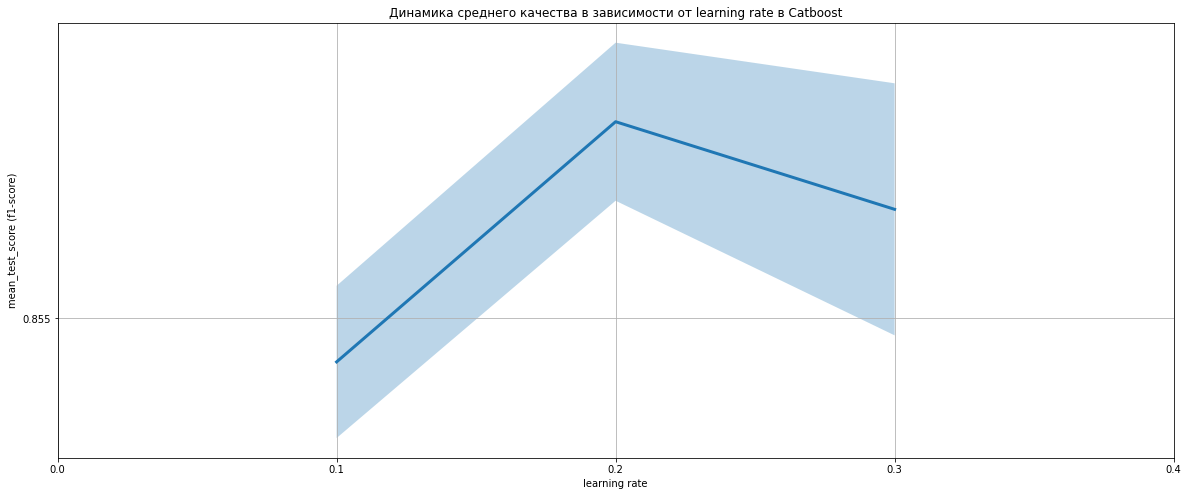

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(0.1,0.31,0.1)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
plt.xlim([0,0.4])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от learning rate в Catboost')
plt.show()

In [ ]:
# Подберем learning rate
params = {'learning_rate': np.arange(0.05,0.16,0.025)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 3,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.8814369	total: 2m 22s	remaining: 19.7s
1406:	learn: 0.8814170	total: 2m 22s	remaining: 19.6s
1407:	learn: 0.8814302	total: 2m 22s	remaining: 19.5s
1408:	learn: 0.8814728	total: 2m 22s	remaining: 19.3s
1409:	learn: 0.8814813	total: 2m 22s	remaining: 19.2s
1410:	learn: 0.8814737	total: 2m 22s	remaining: 19.1s
1411:	learn: 0.8815078	total: 2m 23s	remaining: 19s
1412:	learn: 0.8814786	total: 2m 23s	remaining: 18.9s
1413:	learn: 0.8814719	total: 2m 23s	remaining: 18.8s
1414:	learn: 0.8814861	total: 2m 23s	remaining: 18.7s
1415:	learn: 0.8815424	total: 2m 23s	remaining: 18.6s
1416:	learn: 0.8816008	total: 2m 23s	remaining: 18.5s
1417:	learn: 0.8816926	total: 2m 23s	remaining: 18.4s
1418:	learn: 0.8816998	total: 2m 23s	remaining: 18.3s
1419:	learn: 0.8817891	total: 2m 23s	remaining: 18.2s
1420:	learn: 0.8818220	total: 2m 23s	remaining: 18.1s
1421:	learn: 0.8818357	total: 2m 24s	remaining: 18s
1422:	learn: 0.881

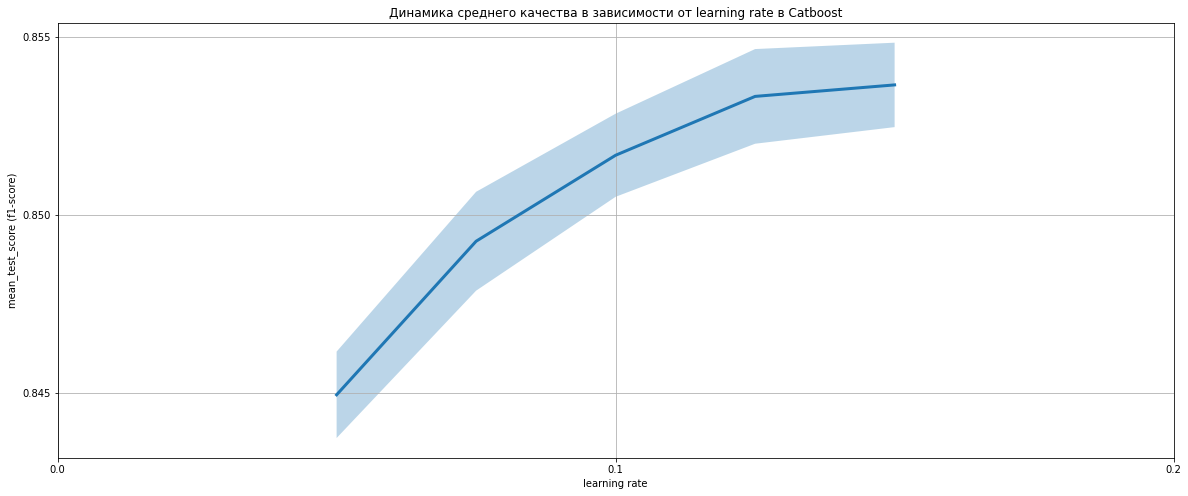

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(0.05,0.16,0.025)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
plt.xlim([0,0.2])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от learning rate в Catboost')
plt.show()

In [ ]:
# Подберем learning rate
params = {'learning_rate': np.arange(0.175,0.26,0.025)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 3,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.8973384	total: 2m 22s	remaining: 19.7s
1406:	learn: 0.8973305	total: 2m 22s	remaining: 19.6s
1407:	learn: 0.8973594	total: 2m 22s	remaining: 19.5s
1408:	learn: 0.8973937	total: 2m 23s	remaining: 19.4s
1409:	learn: 0.8973863	total: 2m 23s	remaining: 19.3s
1410:	learn: 0.8974043	total: 2m 23s	remaining: 19.2s
1411:	learn: 0.8974275	total: 2m 23s	remaining: 19.1s
1412:	learn: 0.8974724	total: 2m 23s	remaining: 19s
1413:	learn: 0.8974497	total: 2m 23s	remaining: 18.9s
1414:	learn: 0.8974933	total: 2m 23s	remaining: 18.8s
1415:	learn: 0.8975165	total: 2m 23s	remaining: 18.7s
1416:	learn: 0.8975226	total: 2m 23s	remaining: 18.6s
1417:	learn: 0.8975521	total: 2m 23s	remaining: 18.5s
1418:	learn: 0.8975677	total: 2m 23s	remaining: 18.4s
1419:	learn: 0.8976186	total: 2m 24s	remaining: 18.3s
1420:	learn: 0.8976274	total: 2m 24s	remaining: 18.2s
1421:	learn: 0.8976629	total: 2m 24s	remaining: 18.1s
1422:	learn: 0.8

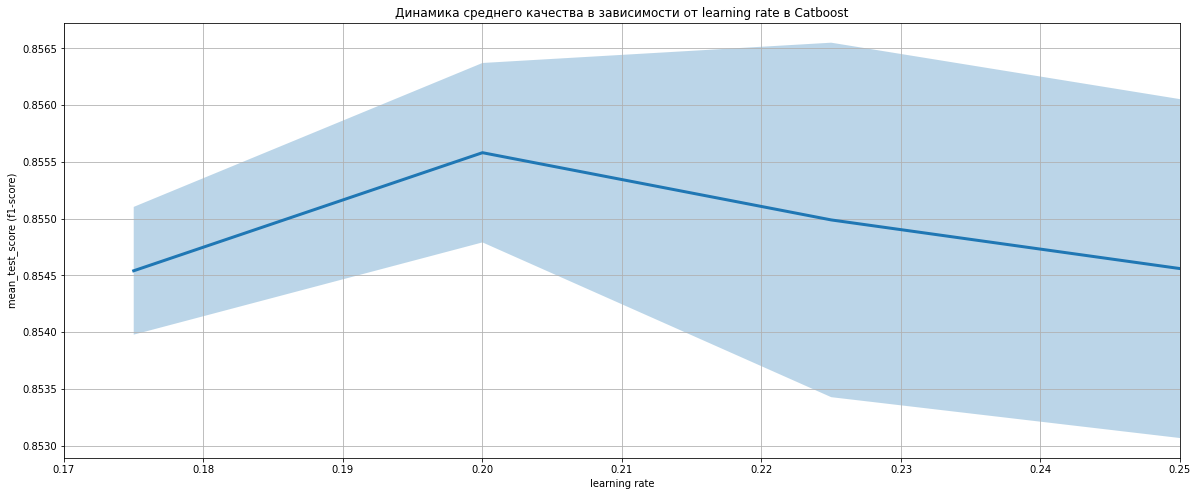

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(0.175,0.26,0.025)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
plt.xlim([0.17,0.25])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от learning rate в Catboost')
plt.show()

In [ ]:
y_catb

0    0.854540
1    0.855581
2    0.854989
3    0.854560
Name: mean_test_score, dtype: float64

Таким образом, для данного набора и размера данных оптимальный learning rate = 0.2 (примерно).

Однако в финальной модели lr будет определяться автоматически катбустом, так как судя по экспериментам, которые были проведены, он ее довольно неплохо подбирает (лучше не мы с помощью поиска по сетке + поведение на большом датасете может быть другим)

**Подберем оптимальную глубину деревьев**  

В катбусте как правильно она варьируется от 4 до 10.

In [ ]:
# Подберем learning rate
params = {'depth': np.arange(3,7,1)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 3,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.8909672	total: 2m 24s	remaining: 19.9s
1406:	learn: 0.8909458	total: 2m 24s	remaining: 19.8s
1407:	learn: 0.8909453	total: 2m 24s	remaining: 19.7s
1408:	learn: 0.8910096	total: 2m 24s	remaining: 19.6s
1409:	learn: 0.8910397	total: 2m 24s	remaining: 19.5s
1410:	learn: 0.8910406	total: 2m 25s	remaining: 19.4s
1411:	learn: 0.8910397	total: 2m 25s	remaining: 19.3s
1412:	learn: 0.8911428	total: 2m 25s	remaining: 19.2s
1413:	learn: 0.8912364	total: 2m 25s	remaining: 19.1s
1414:	learn: 0.8912319	total: 2m 25s	remaining: 19s
1415:	learn: 0.8912882	total: 2m 25s	remaining: 18.9s
1416:	learn: 0.8913103	total: 2m 25s	remaining: 18.8s
1417:	learn: 0.8913485	total: 2m 25s	remaining: 18.7s
1418:	learn: 0.8913129	total: 2m 25s	remaining: 18.6s
1419:	learn: 0.8913867	total: 2m 25s	remaining: 18.5s
1420:	learn: 0.8914371	total: 2m 26s	remaining: 18.4s
1421:	learn: 0.8914518	total: 2m 26s	remaining: 18.3s
1422:	learn: 0.8

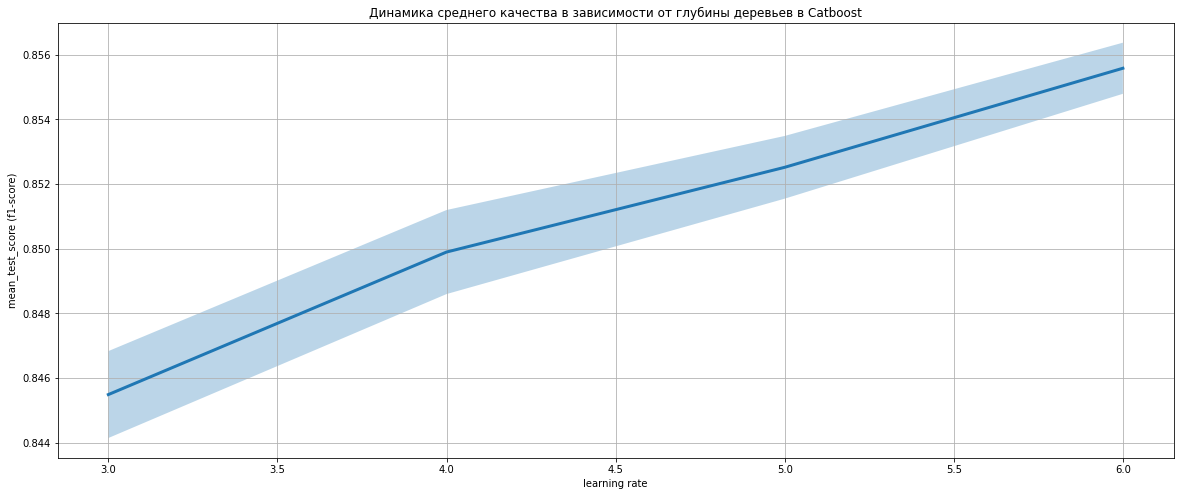

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(3,7,1)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
#plt.xlim([0.17,0.25])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от глубины деревьев в Catboost')
plt.show()

In [ ]:
# Подберем learning rate
params = {'depth': np.arange(7,10,1)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 3,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.9406887	total: 5m 24s	remaining: 44.8s
1406:	learn: 0.9407036	total: 5m 24s	remaining: 44.5s
1407:	learn: 0.9407615	total: 5m 24s	remaining: 44.3s
1408:	learn: 0.9407038	total: 5m 25s	remaining: 44.1s
1409:	learn: 0.9406532	total: 5m 25s	remaining: 43.8s
1410:	learn: 0.9407109	total: 5m 25s	remaining: 43.6s
1411:	learn: 0.9406956	total: 5m 25s	remaining: 43.4s
1412:	learn: 0.9407236	total: 5m 25s	remaining: 43.1s
1413:	learn: 0.9407533	total: 5m 26s	remaining: 42.9s
1414:	learn: 0.9407826	total: 5m 26s	remaining: 42.7s
1415:	learn: 0.9409133	total: 5m 26s	remaining: 42.4s
1416:	learn: 0.9409280	total: 5m 26s	remaining: 42.2s
1417:	learn: 0.9409932	total: 5m 26s	remaining: 42s
1418:	learn: 0.9410505	total: 5m 27s	remaining: 41.7s
1419:	learn: 0.9410061	total: 5m 27s	remaining: 41.5s
1420:	learn: 0.9410939	total: 5m 27s	remaining: 41.3s
1421:	learn: 0.9410927	total: 5m 27s	remaining: 41s
1422:	learn: 0.941

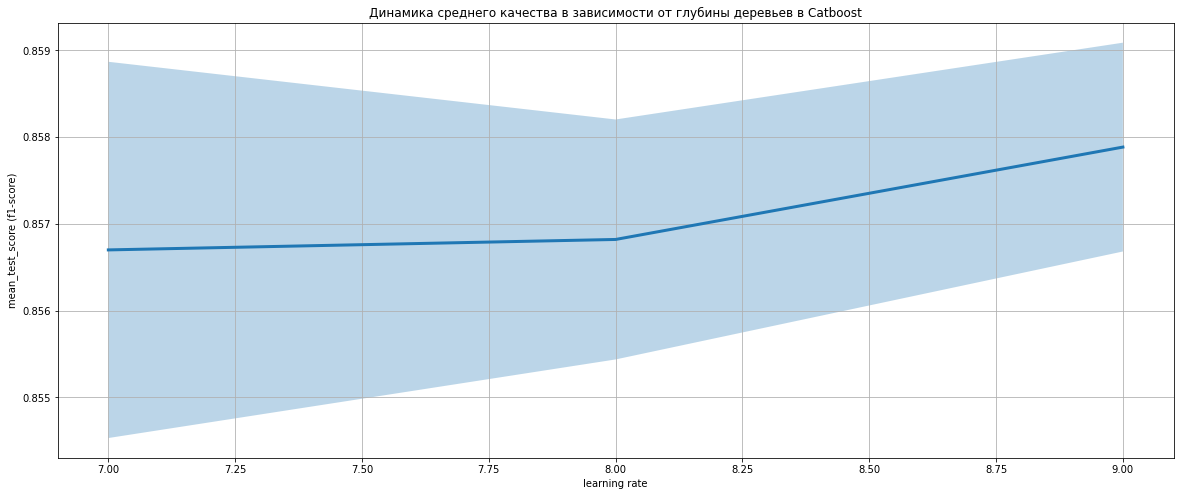

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(7,10,1)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
#plt.xlim([0.17,0.25])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от глубины деревьев в Catboost')
plt.show()

In [ ]:
# Подберем learning rate
params = {'depth': np.arange(10,12,1)}
grid_xgb_lr01 = GridSearchCV(clf,
                               params,
                               cv = 3,
                               scoring='f1_micro',
                               #n_jobs = -1,
                               verbose=3)


# Обучили модель на ВСЕХ данных
grid_xgb_lr = grid_xgb_lr01.fit(X_test, ytest, text_features=text_cols, cat_features=cat_cols)
print('best score roc_auc by xgboost:', grid_xgb_lr.best_score_)
    # grid.best_score_ - посмотрим на лучшее качество
print('best params by xgboost:',grid_xgb_lr.best_params_)
    # grid.best_params_ - посмотрим на наилучшее значение параметра 'learning rate'

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
1405:	learn: 0.9737389	total: 13m 1s	remaining: 1m 47s
1406:	learn: 0.9737750	total: 13m 2s	remaining: 1m 47s
1407:	learn: 0.9738258	total: 13m 2s	remaining: 1m 46s
1408:	learn: 0.9738619	total: 13m 3s	remaining: 1m 46s
1409:	learn: 0.9738906	total: 13m 3s	remaining: 1m 45s
1410:	learn: 0.9738762	total: 13m 4s	remaining: 1m 45s
1411:	learn: 0.9738837	total: 13m 4s	remaining: 1m 44s
1412:	learn: 0.9739053	total: 13m 5s	remaining: 1m 43s
1413:	learn: 0.9739415	total: 13m 5s	remaining: 1m 43s
1414:	learn: 0.9739344	total: 13m 6s	remaining: 1m 42s
1415:	learn: 0.9739197	total: 13m 6s	remaining: 1m 42s
1416:	learn: 0.9739344	total: 13m 7s	remaining: 1m 41s
1417:	learn: 0.9739417	total: 13m 7s	remaining: 1m 41s
1418:	learn: 0.9739636	total: 13m 8s	remaining: 1m 40s
1419:	learn: 0.9740431	total: 13m 8s	remaining: 1m 39s
1420:	learn: 0.9741297	total: 13m 9s	remaining: 1m 39s
1421:	learn: 0.9741368	total: 13m 9s	remaining: 1m 3

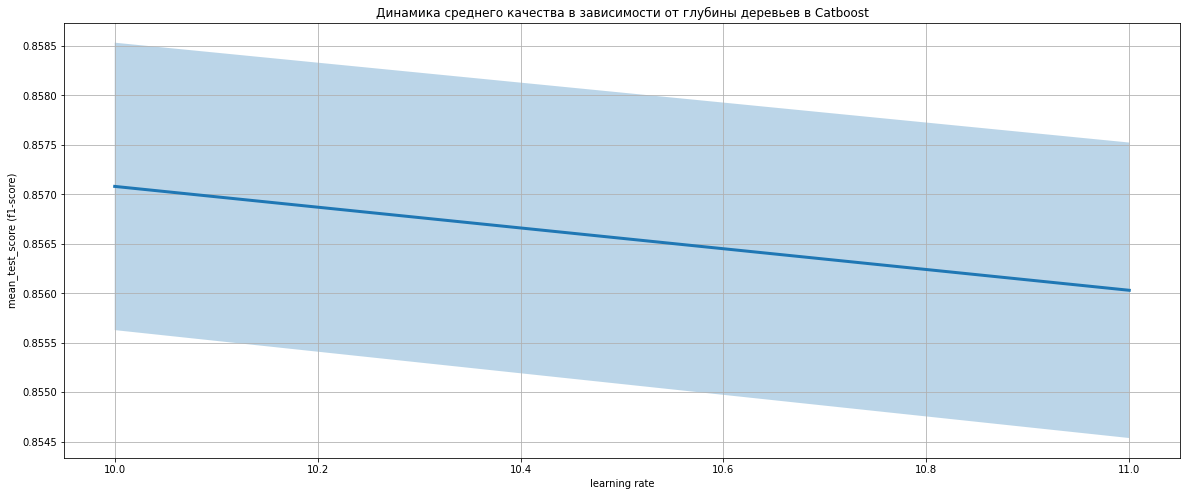

In [ ]:
# график среднего качества

# Положим в датафрейм некоторые характеристики 
df_catb_cv_res = pd.DataFrame(grid_xgb_lr.cv_results_)
y_catb = df_catb_cv_res['mean_test_score']
x_catb = np.arange(10,12,1)

# Построение графика
fig, ax = plt.subplots(figsize=(20, 8))
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.0005))
ax.grid()
ax.plot(x_catb, y_catb, lw=3)
#plt.xlim([0.17,0.25])
    
# 95% доверительный интервал
y_coordinate_up = df_catb_cv_res['mean_test_score'] + 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
y_coordinate_low = df_catb_cv_res['mean_test_score'] - 1.96 * (df_catb_cv_res['std_test_score']/5**(1/2))
ax.fill_between(x_catb, y_coordinate_low, y_coordinate_up, alpha = 0.3)

    
ax.set_ylabel('mean_test_score (f1-score)')
ax.set_xlabel('learning rate')
ax.set_title('Динамика среднего качества в зависимости от глубины деревьев в Catboost')
plt.show()

Лучше всего было с глубиной 9 деревьев